<a href="https://colab.research.google.com/github/ZawWin58/firstproject/blob/master/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install pandasql
from pandasql import sqldf
import pandas as pd

  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26819 sha256=1960b209437d849fb0dd1ef51f9a9508171ff57ea2209c7c3cb1105cabf3ec40
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.impute
import sklearn.preprocessing
# Enable inline plots
%matplotlib inline
# Set plot style
sns.set(style="ticks")
# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [0]:
pd.set_option("display.width", 70)

In [0]:
data = pd.read_csv("fundamentals.csv")

In [0]:
data.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.000000e+00,223000000.0,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,11000000.0,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.000000e+00,935000000.0,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,481000000.0,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,1.562000e+10,88.0,0.000000e+00,829000000.0,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.0,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,601000000.0,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,80.0,0.0,-8.562000e+09,-1.052000e+09,2.068600e+10,1.677000e+09,6.309000e+09,4.322

In [0]:
data.dtypes

Unnamed: 0                        int64
Ticker Symbol                    object
Period Ending                    object
Accounts Payable                float64
Accounts Receivable             float64
                                 ...   
Total Revenue                   float64
Treasury Stock                  float64
For Year                        float64
Earnings Per Share              float64
Estimated Shares Outstanding    float64
Length: 79, dtype: object

In [0]:
data.shape

(1781, 79)

In [0]:
data.isnull().sum()

Unnamed: 0                        0
Ticker Symbol                     0
Period Ending                     0
Accounts Payable                  0
Accounts Receivable               0
                               ... 
Total Revenue                     0
Treasury Stock                    0
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
Length: 79, dtype: int64

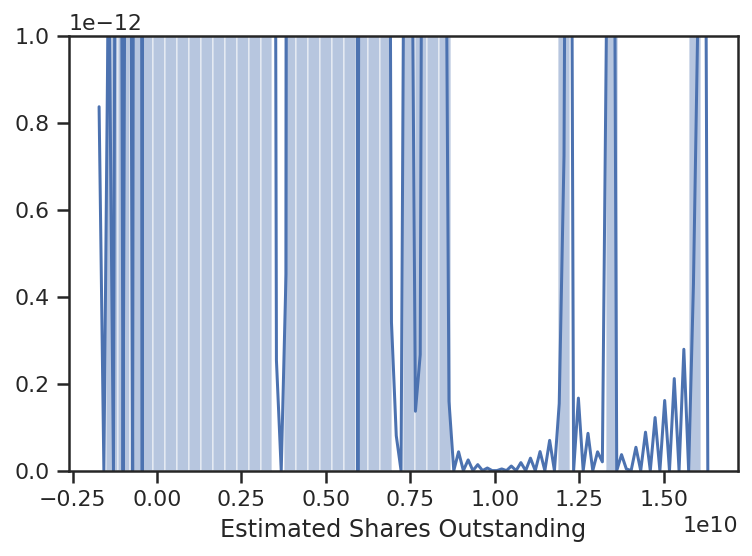

In [0]:
sns.distplot(data["Estimated Shares Outstanding"].fillna(0));

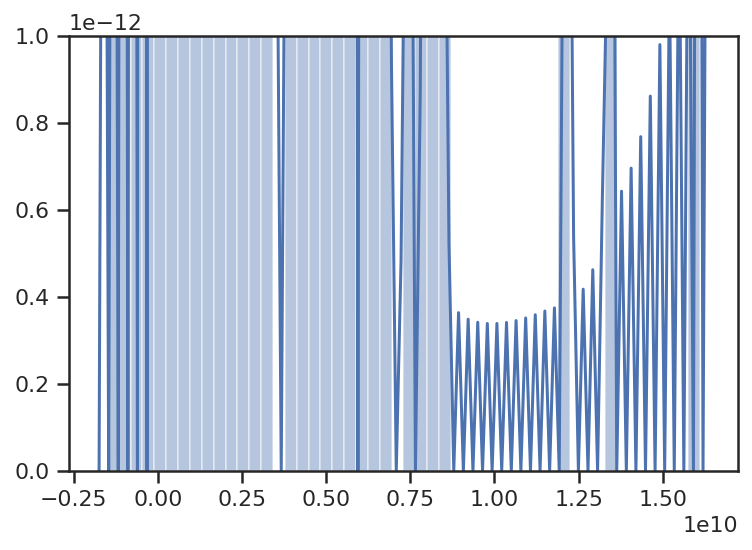

In [0]:
mean_imp = sklearn.impute.SimpleImputer(strategy="mean")
mean_rat = mean_imp.fit_transform(data[["Estimated Shares Outstanding"]])
sns.distplot(mean_rat);

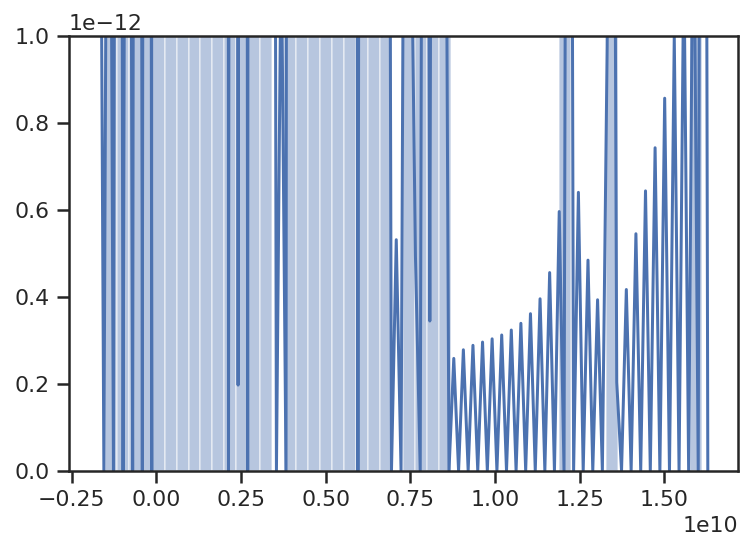

In [0]:
med_imp = sklearn.impute.SimpleImputer(strategy="median")
med_rat = med_imp.fit_transform(data[["Estimated Shares Outstanding"]])
sns.distplot(med_rat);

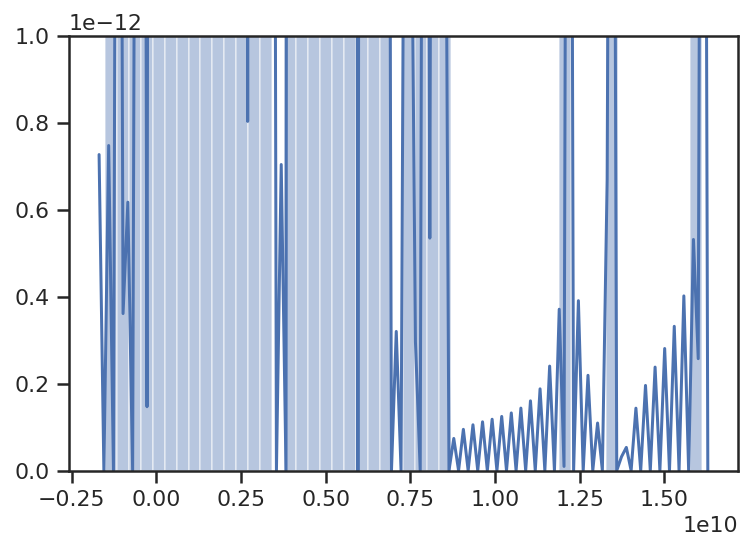

In [0]:
freq_imp = sklearn.impute.SimpleImputer(strategy="most_frequent")
freq_rat = freq_imp.fit_transform(data[["Estimated Shares Outstanding"]])
sns.distplot(freq_rat);

In [0]:
data["Estimated Shares Outstanding"] = mean_rat

In [0]:
types = data["For Year"].dropna().astype(str)
types.value_counts()

2014.0    428
2013.0    425
2015.0    425
2012.0    244
2016.0     85
1215.0      1
Name: For Year, dtype: int64

In [0]:
le = sklearn.preprocessing.LabelEncoder()
type_le = le.fit_transform(types)
print(np.unique(type_le))
le.inverse_transform(np.unique(type_le))

[0 1 2 3 4 5]


array(['1215.0', '2012.0', '2013.0', '2014.0', '2015.0', '2016.0'],
      dtype=object)

In [0]:
type_oh = pd.get_dummies(types)
type_oh.head()

,1215.0,2012.0,2013.0,2014.0,2015.0,2016.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0


In [0]:
type_oh[type_oh["2014.0"] == 1].head()

,1215.0,2012.0,2013.0,2014.0,2015.0,2016.0
2,0,0,0,1,0,0
6,0,0,0,1,0,0
9,0,0,0,1,0,0
14,0,0,0,1,0,0
17,0,0,0,1,0,0


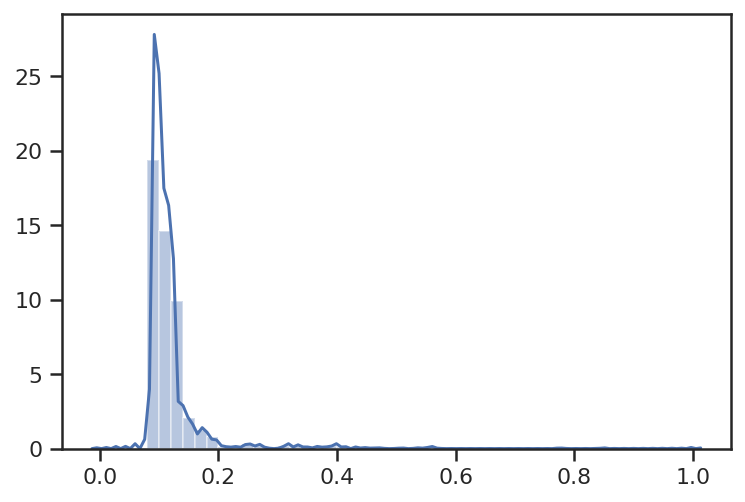

In [0]:
mm = sklearn.preprocessing.MinMaxScaler()
sns.distplot(mm.fit_transform(data[["Estimated Shares Outstanding"]]));

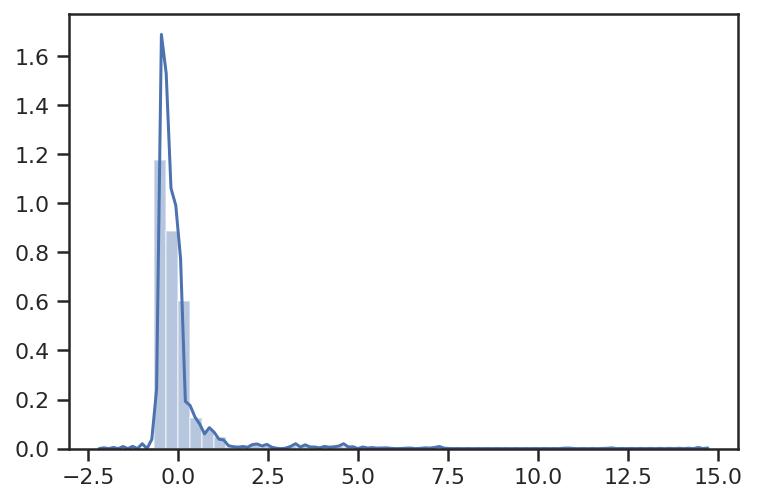

In [0]:
ss = sklearn.preprocessing.StandardScaler()
sns.distplot(ss.fit_transform(data[["Estimated Shares Outstanding"]]));